In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
#reading the dataset
boom = pd.read_csv('day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom.shape

(730, 16)

In [5]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boom.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# Assign symbols to season columns

def assign_season(x):
    if x == 1:
        return "Spring"
    elif x == 2:
        return "Summer"
    elif x == 3: 
        return "Fall"
    elif x == 4:
        return "Winter"

In [9]:
boom['season'] = boom['season'].apply(assign_season)

In [10]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Assigning symbols to Month column as it is categorical in nature
def assign_mnth(x):
    return x.map({
        1:"Jan", 2:"Feb", 3: "Mar", 4:"Apr", 5: "May", 6:"Jun", 7:"Jul",
        8:"Aug", 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })


In [12]:
boom[['mnth']] = boom[['mnth']].apply(assign_mnth)

In [13]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
boom['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [15]:
#Assigning symbols to weekday, weathersit column as it is categorical in nature

def assign_weekday(x):
    return x.map({
        0: "Sun", 1:"Mon", 2:"Tue", 3: "Wed", 4:"Thu", 5: "Fri", 6:"Sat"
    })

boom[['weekday']] = boom[['weekday']].apply(assign_weekday)

In [16]:
boom['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
#Assigning symbols to weather column as it is categorical in nature
def assign_weather(x):
    if x == 1:
        return "Clear"
    elif x == 2:
        return "Cloudy"
    elif x == 3:
        return "Stormy"
    
boom['weathersit'] = boom['weathersit'].apply(assign_weather)

In [18]:
boom['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [19]:
#Assigning symbols to year column as it is not numerical in nature
def assign_yr(x):
    if x == 0:
        return "2018"
    elif x == 1:
        return "2019"
boom['yr'] = boom['yr'].apply(assign_yr)

In [20]:
boom['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
boom['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

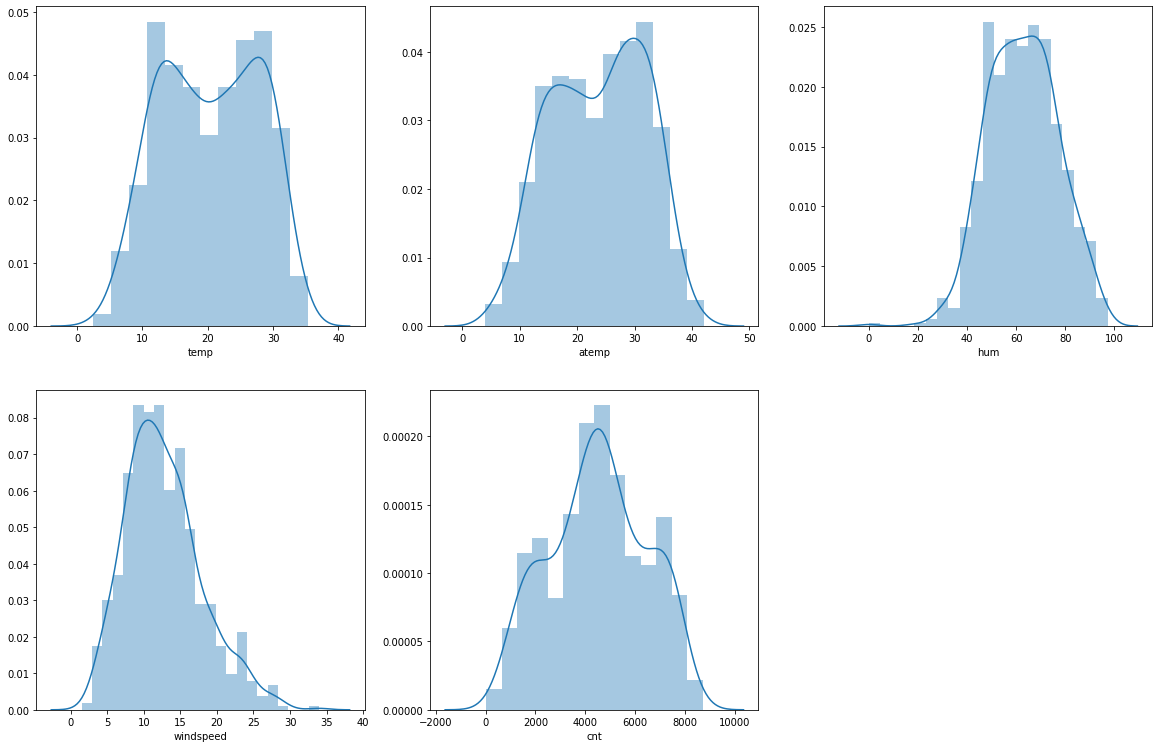

In [22]:
#Data Visualization
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.distplot(boom['temp'])

plt.subplot(3,3,2)
sns.distplot(boom['atemp'])

plt.subplot(3,3,3)
sns.distplot(boom['hum'])

plt.subplot(3,3,4)
sns.distplot(boom['windspeed'])

plt.subplot(3,3,5)
sns.distplot(boom['cnt'])
plt.show()

In [23]:
# Convert date to DateTime format
boom['dteday'] = boom['dteday'].astype('datetime64')

In [24]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
#Categorical data types
boom_categorical = boom.select_dtypes(exclude=['float64','int64','datetime64'])
boom_categorical

,season,yr,mnth,weekday,weathersit
0,Spring,2018,Jan,Mon,Cloudy
1,Spring,2018,Jan,Tue,Cloudy
2,Spring,2018,Jan,Wed,Clear
3,Spring,2018,Jan,Thu,Clear
4,Spring,2018,Jan,Fri,Clear
...,...,...,...,...,...
725,Spring,2019,Dec,Fri,Cloudy
726,Spring,2019,Dec,Sat,Cloudy
727,Spring,2019,Dec,Sun,Cloudy
728,Spring,2019,Dec,Mon,Clear


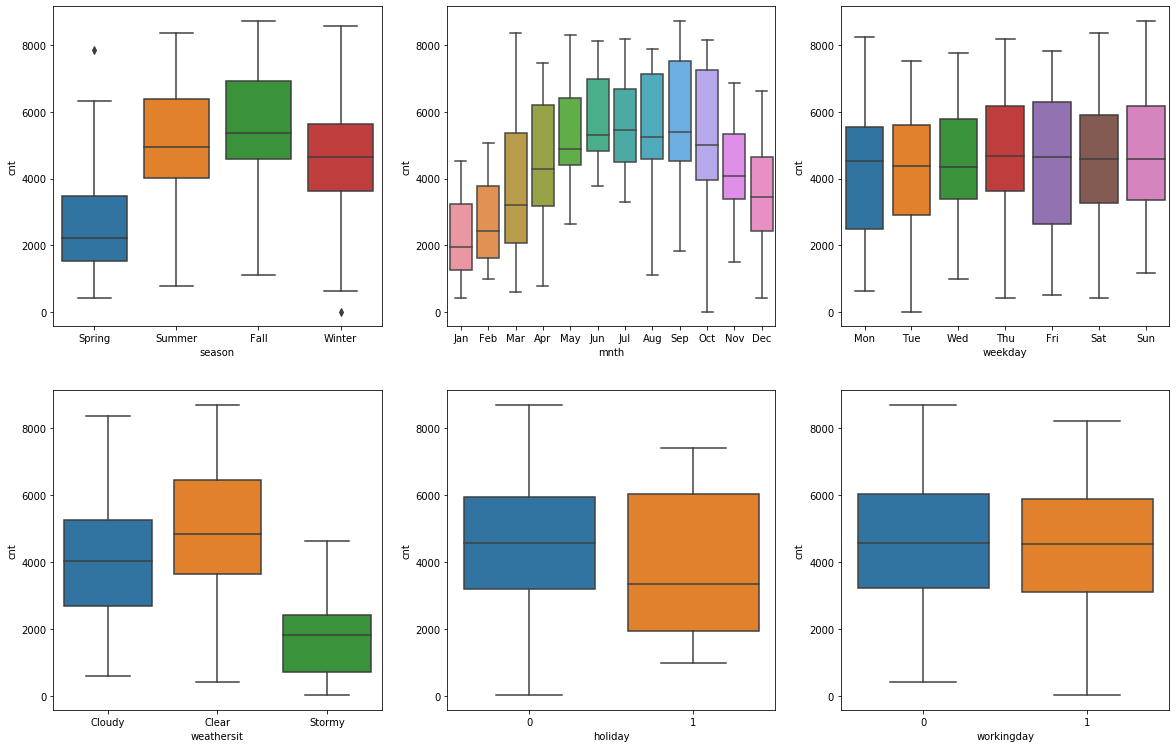

In [26]:
#Visualising categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=boom)

plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=boom)

plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=boom)

plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=boom)

plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=boom)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=boom)





In [27]:
boom.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [28]:
# Visualizing Numerical Variables

IntVariableList = ['casual','registered','cnt']

for var in IntVariableList:
    boom[var] = boom[var].astype('float')

In [29]:
boom_numeric = boom.select_dtypes(include=['float64'])

In [30]:
boom_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


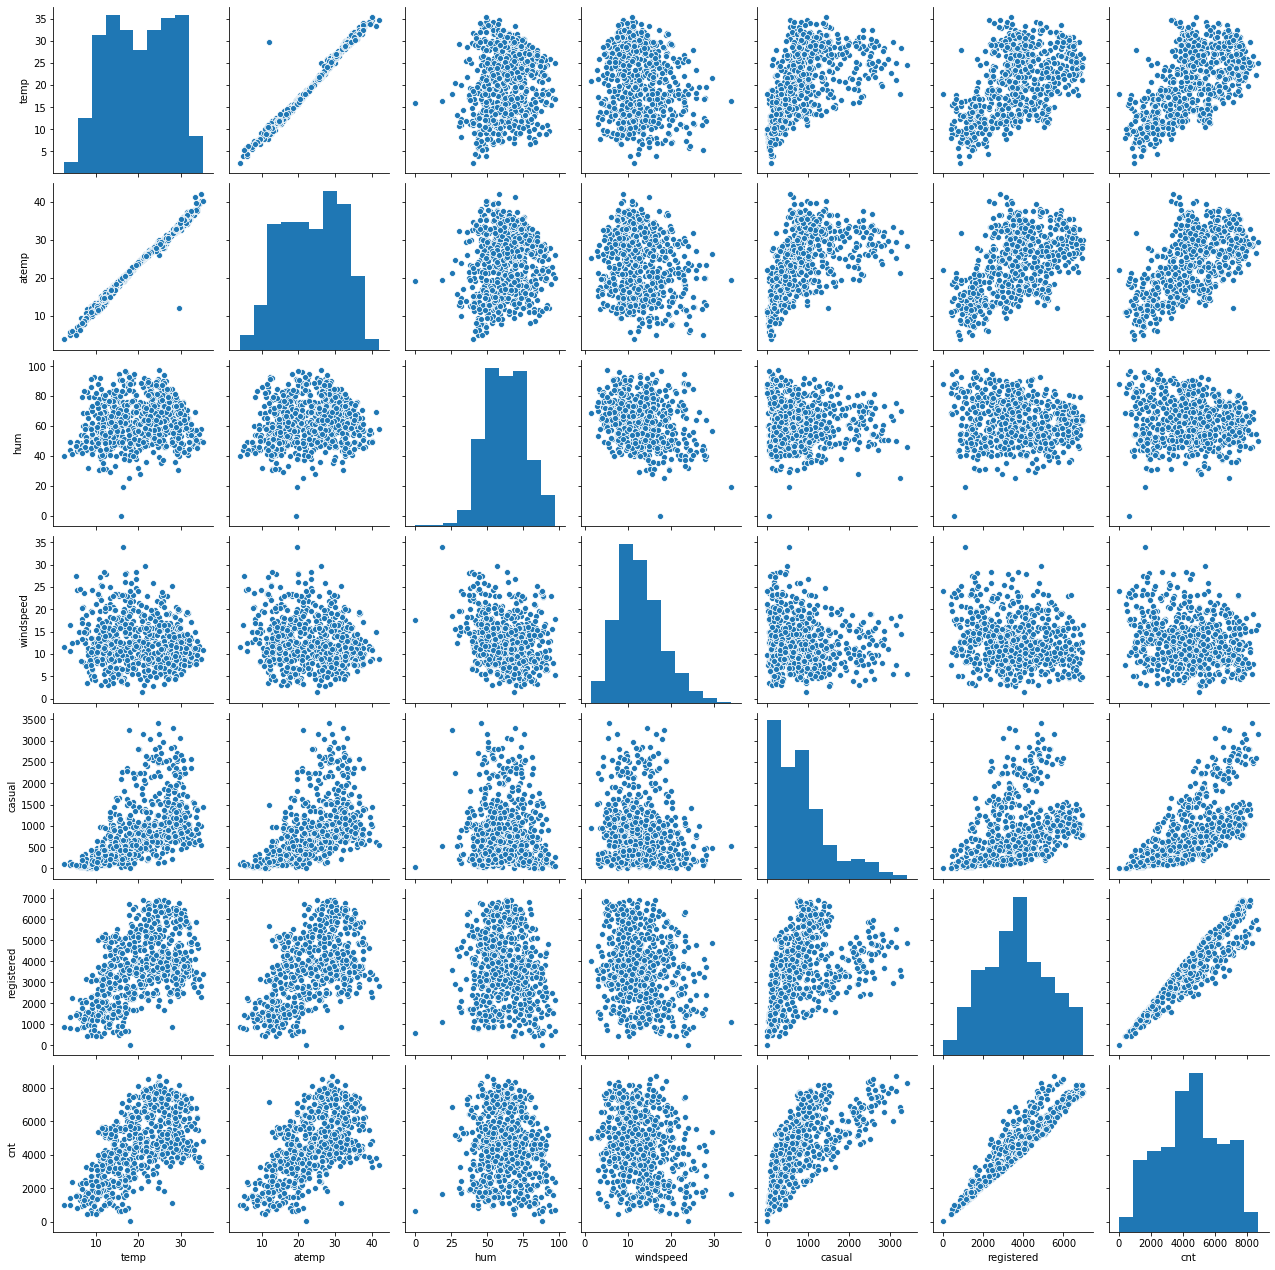

In [31]:
sns.pairplot(boom_numeric)
plt.show();

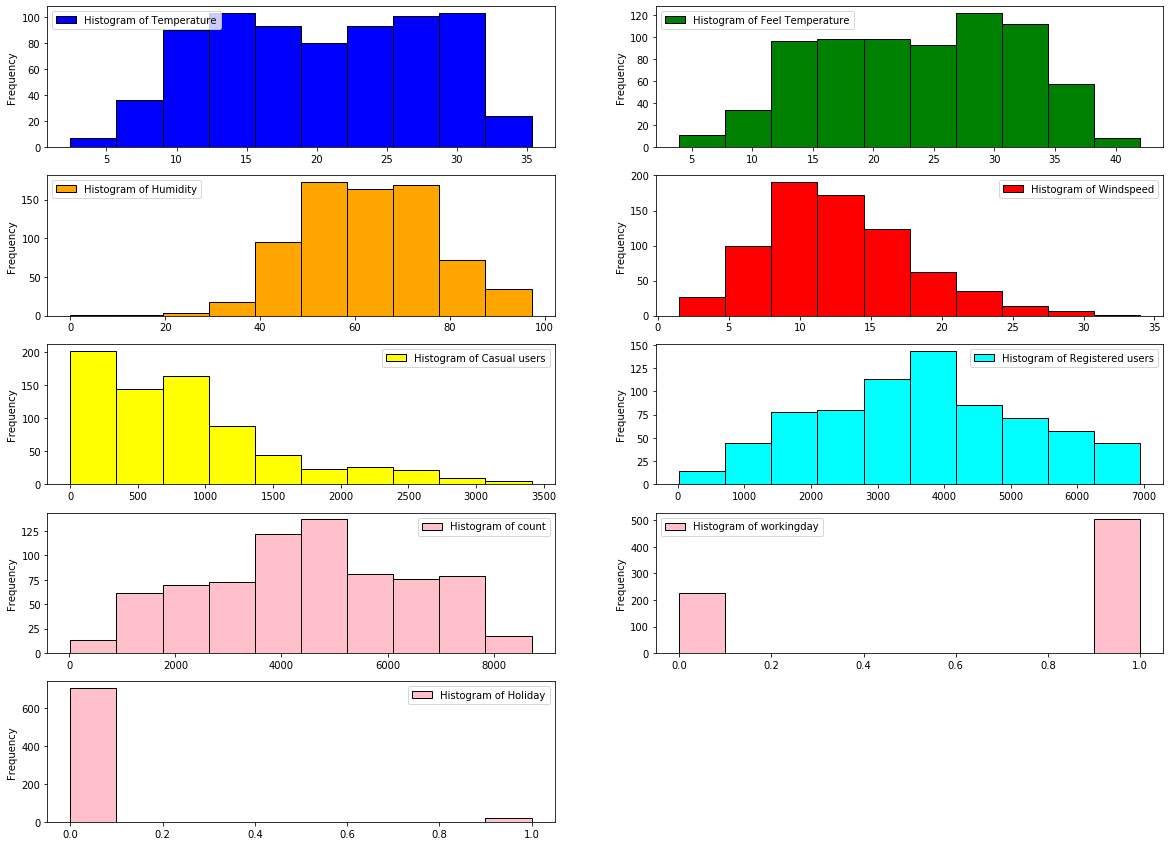

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(521)
boom['temp'].plot.hist(bins=10, color='blue', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')

plt.subplot(522)
boom['atemp'].plot.hist(bins=10, color='green', label='Histogram of Feel Temperature', edgecolor='black')
plt.legend(loc='best')

plt.subplot(523)
boom['hum'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')

plt.subplot(524)
boom['windspeed'].plot.hist(bins=10, color='red', label='Histogram of Windspeed', edgecolor='black')
plt.legend(loc='best')

plt.subplot(525)
boom['casual'].plot.hist(bins=10, color='yellow', label='Histogram of Casual users', edgecolor='black')
plt.legend(loc='best')

plt.subplot(526)
boom['registered'].plot.hist(bins=10, color='cyan', label='Histogram of Registered users', edgecolor='black')
plt.legend(loc='best')

plt.subplot(527)
boom['cnt'].plot.hist(bins=10, color='pink', label='Histogram of count', edgecolor='black')
plt.legend(loc='best')


plt.subplot(528)
boom['workingday'].plot.hist(bins=10, color='pink', label='Histogram of workingday', edgecolor='black')
plt.legend(loc='best')

plt.subplot(529)
boom['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')


In [33]:
boom.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [34]:
cor = boom_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


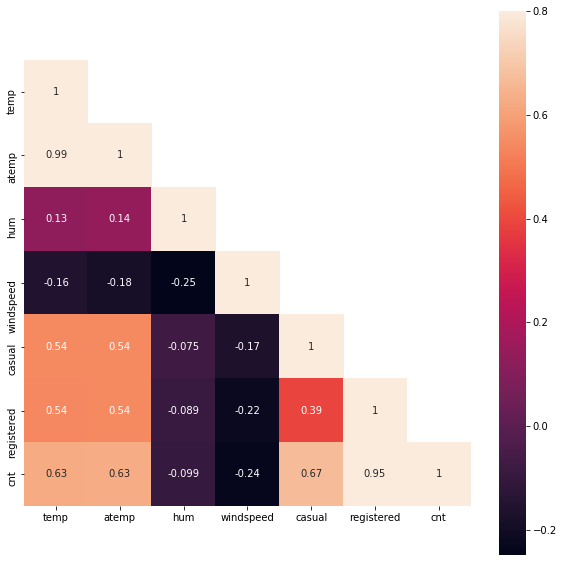

In [35]:
# heatmap

mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True);

In [36]:
#Dropping atemp as temp and atemp are highly correlated 
boom.drop('atemp', axis = 1, inplace = True)

In [37]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [38]:
# Dummy encoding categorical variables
boom_dummies = pd.get_dummies(boom_categorical, drop_first = True)


In [39]:
list(boom_categorical)

['season', 'yr', 'mnth', 'weekday', 'weathersit']

In [40]:
boom = boom.drop(list(boom_categorical.columns), axis=1)

In [41]:
boom.shape

(730, 10)

In [42]:
boom = pd.concat([boom, boom_dummies], axis = 1)

In [43]:
boom.head()

,instant,dteday,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
0,1,2018-01-01,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#Dropping instant, dteday, casual, registered
cols = ['instant', 'dteday', 'casual', 'registered']
boom = boom.drop(cols, axis=1)

## Model Building

In [45]:
X = boom.drop('cnt', axis = 1)
y = boom.cnt

In [46]:
X.shape


(730, 28)

In [47]:
y.shape

(730,)

In [48]:
#train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train.shape

(584, 28)

In [50]:
X_test.shape

(146, 28)

In [51]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Stormy'],
      dtype='object')

## Scaling


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train.dtypes

holiday                int64
workingday             int64
temp                 float64
hum                  float64
windspeed            float64
season_Spring          uint8
season_Summer          uint8
season_Winter          uint8
yr_2019                uint8
mnth_Aug               uint8
mnth_Dec               uint8
mnth_Feb               uint8
mnth_Jan               uint8
mnth_Jul               uint8
mnth_Jun               uint8
mnth_Mar               uint8
mnth_May               uint8
mnth_Nov               uint8
mnth_Oct               uint8
mnth_Sep               uint8
weekday_Mon            uint8
weekday_Sat            uint8
weekday_Sun            uint8
weekday_Thu            uint8
weekday_Tue            uint8
weekday_Wed            uint8
weathersit_Cloudy      uint8
weathersit_Stormy      uint8
dtype: object

In [54]:
var = ['temp', 'hum', 'windspeed']
X_train[var] = scaler.fit_transform(X_train[var])

X_test[var] = scaler.transform(X_test[var])


In [55]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
239,0,1,1.169798,-0.460004,1.494191,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
97,0,0,-0.849259,1.498668,0.480773,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
503,0,0,0.587516,-1.212939,-1.385350,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
642,0,0,0.669099,0.009068,-1.093395,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
498,0,1,0.442477,1.165661,0.294182,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Model building using RFE

In [56]:
len(X_train.columns)

28

In [57]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
X_train.shape

(584, 28)

In [60]:
rfe = RFE(lm, 13)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 6),
 ('windspeed', False, 7),
 ('season_Spring', True, 1),
 ('season_Summer', False, 15),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Stormy', True, 1)]

In [62]:
(rfe.support_==True).sum()

13

In [63]:
rfe.ranking_

array([ 1,  1,  1,  6,  7,  1, 15,  1,  1, 10,  2,  4,  3,  1, 11, 13,  5,
        1, 14,  1,  8,  1,  1, 16,  9, 12,  1,  1])

In [64]:
rfe.support_

array([ True,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True])

In [65]:
X_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Cloudy', 'weathersit_Stormy'],
      dtype='object')

In [66]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [67]:
X_train_rfe.head()

,holiday,workingday,temp,season_Spring,season_Winter,yr_2019,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Cloudy,weathersit_Stormy
239,0,1,1.169798,0,0,0,0,0,0,0,0,0,0
97,0,0,-0.849259,0,0,0,0,0,0,0,1,1,0
503,0,0,0.587516,0,0,1,0,0,0,0,1,0,0
642,0,0,0.669099,0,1,1,0,0,0,1,0,0,0
498,0,1,0.442477,0,0,1,0,0,0,0,0,1,0


In [68]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [69]:
#model1
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          5.67e-197
Time:                        11:14:31   Log-Likelihood:                -4746.5
No. Observations:                 584   AIC:                             9521.
Df Residuals:                     570   BIC:                             9582.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4702.6680    552.23

In [70]:
checkVIF(X_train_new)

,Features,VIF
0,const,258.85
2,workingday,53.41
10,weekday_Sat,30.73
11,weekday_Sun,30.15
1,holiday,5.47
3,temp,2.99
4,season_Spring,2.67
5,season_Winter,1.99
8,mnth_Nov,1.49
7,mnth_Jul,1.29


In [71]:
# weekday_Sun has high VIF and P value
X_train_rfe2 = X_train_rfe.drop(['weekday_Sun'], axis=1)

In [72]:

X_train_rfe2.columns

Index(['holiday', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Cloudy', 'weathersit_Stormy'],
      dtype='object')

In [73]:
# Again building model and checking p value and VIF
#model2
X_train_new = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     205.1
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          5.68e-198
Time:                        11:14:31   Log-Likelihood:                -4746.9
No. Observations:                 584   AIC:                             9520.
Df Residuals:                     571   BIC:                             9577.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4228.5348    114.54

In [74]:
checkVIF(X_train_new)

,Features,VIF
0,const,11.14
3,temp,2.98
4,season_Spring,2.66
5,season_Winter,1.99
2,workingday,1.85
10,weekday_Sat,1.71
8,mnth_Nov,1.48
7,mnth_Jul,1.29
1,holiday,1.16
9,mnth_Sep,1.09


In [75]:
#weekday_Sat has high VIF and P value
X_train_rfe3 = X_train_rfe2.drop(['weekday_Sat'], axis=1)

In [76]:
X_train_rfe3.columns

Index(['holiday', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Stormy'],
      dtype='object')

In [77]:
#model2
X_train_new = build_model(X_train_rfe3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     223.7
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          5.50e-199
Time:                        11:14:31   Log-Likelihood:                -4747.3
No. Observations:                 584   AIC:                             9519.
Df Residuals:                     572   BIC:                             9571.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4171.4796     94.85

In [78]:
checkVIF(X_train_new)

,Features,VIF
0,const,7.64
3,temp,2.98
4,season_Spring,2.66
5,season_Winter,1.99
8,mnth_Nov,1.47
7,mnth_Jul,1.29
9,mnth_Sep,1.09
1,holiday,1.08
2,workingday,1.08
10,weathersit_Cloudy,1.06


## Residual Analysis


In [79]:
lm = sm.OLS(y_train, X_train_new).fit()

In [80]:
y_train_pred = lm.predict(X_train_new)

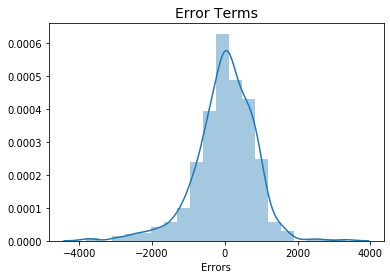

In [81]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10);

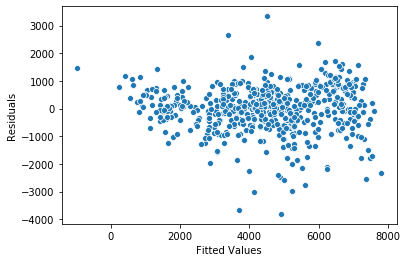

In [82]:
fig = plt.figure()
sns.scatterplot(y = (y_train - y_train_pred), x =y_train_pred )
plt.ylabel("Residuals", fontsize=10);
plt.xlabel("Fitted Values", fontsize=10);

## Predictions and Evaluation on Test Set

In [83]:
X_test.head()

,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
196,0,1,1.058888,-0.294204,0.237423,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187,0,0,1.403349,0.178544,-0.403795,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0,1,-1.406745,-0.909667,-0.419936,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0,1,-1.630605,1.450965,-1.786740,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
390,0,0,-0.817529,1.022945,-1.523390,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [84]:
X_test.describe()

,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.034247,0.678082,0.098254,0.050755,0.023194,0.280822,0.219178,0.219178,0.520548,0.082192,...,0.061644,0.130137,0.157534,0.143836,0.143836,0.102740,0.143836,0.171233,0.342466,0.047945
std,0.182488,0.468820,0.974780,1.076920,1.058224,0.450948,0.415114,0.415114,0.501297,0.275602,...,0.241335,0.337612,0.365558,0.352131,0.352131,0.304664,0.352131,0.378009,0.476168,0.214386
min,0.000000,0.000000,-1.923440,-4.468651,-2.188905,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.680426,-0.688161,-0.742410,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.243052,0.120565,-0.152101,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.880989,0.798465,0.548744,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.938172,2.297957,4.140430,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
X_test.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Stormy'],
      dtype='object')

In [86]:
y_test

196    5923.0
187    4592.0
14     1248.0
31     1360.0
390    4075.0
        ...  
118    4595.0
566    4459.0
688    5634.0
266    5423.0
504    7129.0
Name: cnt, Length: 146, dtype: float64

In [87]:
X_test

,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
196,0,1,1.058888,-0.294204,0.237423,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187,0,0,1.403349,0.178544,-0.403795,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0,1,-1.406745,-0.909667,-0.419936,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0,1,-1.630605,1.450965,-1.786740,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
390,0,0,-0.817529,1.022945,-1.523390,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0.098016,-1.206995,0.651326,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
566,0,0,0.564852,1.706798,0.302116,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
688,0,1,-0.640765,0.419377,-1.401660,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
266,0,1,0.623777,1.685983,-1.458312,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [88]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Stormy
196,1.0,0,1,1.058888,-0.294204,0.237423,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187,1.0,0,0,1.403349,0.178544,-0.403795,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,1.0,0,1,-1.406745,-0.909667,-0.419936,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31,1.0,0,1,-1.630605,1.450965,-1.786740,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1.0,0,0,-0.817529,1.022945,-1.523390,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [89]:
len(X_test_sm.columns)

29

In [90]:
len(X_train_new.columns)

12

In [91]:
vars = list(set(X_test_sm.columns) - set(X_train_new.columns))

In [92]:
vars

['hum',
 'weekday_Sat',
 'mnth_Aug',
 'mnth_Mar',
 'mnth_Jan',
 'weekday_Sun',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Oct',
 'season_Summer',
 'weekday_Thu',
 'weekday_Mon',
 'mnth_May',
 'mnth_Jun',
 'windspeed',
 'weekday_Wed',
 'weekday_Tue']

In [93]:
X_test_sm = X_test_sm.drop(vars, axis = 1)

In [94]:
# predict 
y_test_pred = lm.predict(X_test_sm)

In [95]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8563035366257625

In [96]:
y_test

196    5923.0
187    4592.0
14     1248.0
31     1360.0
390    4075.0
        ...  
118    4595.0
566    4459.0
688    5634.0
266    5423.0
504    7129.0
Name: cnt, Length: 146, dtype: float64